In [6]:
import pandas as pd
import re

In [7]:
data=pd.read_csv('Data - for Assignment 2.txt', error_bad_lines=False, header=None)

b'Skipping line 25: expected 2 fields, saw 5\nSkipping line 27: expected 2 fields, saw 3\nSkipping line 35: expected 2 fields, saw 3\nSkipping line 56: expected 2 fields, saw 3\nSkipping line 60: expected 2 fields, saw 6\nSkipping line 62: expected 2 fields, saw 4\nSkipping line 78: expected 2 fields, saw 4\nSkipping line 114: expected 2 fields, saw 3\nSkipping line 126: expected 2 fields, saw 4\nSkipping line 129: expected 2 fields, saw 3\nSkipping line 135: expected 2 fields, saw 3\nSkipping line 150: expected 2 fields, saw 3\nSkipping line 168: expected 2 fields, saw 4\nSkipping line 174: expected 2 fields, saw 5\nSkipping line 176: expected 2 fields, saw 4\nSkipping line 204: expected 2 fields, saw 3\nSkipping line 212: expected 2 fields, saw 3\nSkipping line 262: expected 2 fields, saw 3\nSkipping line 263: expected 2 fields, saw 5\nSkipping line 266: expected 2 fields, saw 3\nSkipping line 267: expected 2 fields, saw 3\nSkipping line 269: expected 2 fields, saw 3\nSkipping line 2

In [8]:
data.columns=['Date','Text']

In [9]:
data.head()

,Date,Text
0,08/02/18,4:09 PM - Messages to this group are now secu...
1,22/09/17,"5:01 PM - Moms Event Sonakshi created group ""..."
2,08/02/18,4:09 PM - Moms Event Sonakshi added you
3,08/02/18,4:17 PM - Moms Event Sonakshi added Eboli Mam Bd
4,08/02/18,4:27 PM - Moms Event Sonakshi added Bd Reetika


In [10]:
data.isnull().sum()

Date      0
Text    637
dtype: int64

In [11]:
data.loc[data.Text.isnull()]

,Date,Text
33,Is that normal?,NaN
34,How is it supposed to look?,NaN
35,How do I know my baby is not in pain because o...,NaN
36,When will it heal and subside?,NaN
37,How do I care for it?,NaN
...,...,...
3820,My baby is 9 months old,NaN
3832,Is this okay? ??,NaN
3852,https://www.amazon.in/gp/aw/d/B01M0PR3NG/ref=a...,NaN
3870,1 pinch of choornam is directly applied over t...,NaN


In [7]:
data.loc[[31]]

,Date,Text
31,08/02/18,7:08 PM - Bd Reetika: Yes you can just start ...


In [8]:
data.loc[[32]]

,Date,Text
32,After a newborn baby arrives,you might have some questions related to umbi...


# Data cleaning

In [9]:
#change date string into datetime
for i in range(len(data)):
    try:
        data.loc[i,['Date']]=pd.to_datetime(data.loc[i,'Date'])
    except:
        pass

In [10]:
#check if data in date column is not date then get the text and put in to Text column and make the respective date none
for i in range(len(data)):
    if type(data.Date[i])!=pd._libs.tslibs.timestamps.Timestamp:
        if type(data['Text'][i])==str:
            string=data.Date[i]+data['Text'][i]
        else:
            string=data.Date[i]
        data['Text'][i]=string
        data.Date[i]=None

In [11]:
#check string before processing
data['Text'][31]

' 7:08 PM - Bd Reetika: Yes you can just start wd half or 1/4th as sometimes baby get constipated.'

In [12]:
#get the whole text as one text
for i in range(len(data)):
    if data.Date[i]==None:
        string=data.Text[i]
        for j in range((i-1),-1,-1):
            if data.Date[j]!=None:
                data.Text[j]=data.Text[j]+'. '+string
                break

In [13]:
#check the same string after processing
data['Text'][31]

" 7:08 PM - Bd Reetika: Yes you can just start wd half or 1/4th as sometimes baby get constipated.. After a newborn baby arrives you might have some questions related to umbilical stump like:. Is that normal?. How is it supposed to look?. How do I know my baby is not in pain because of it?. When will it heal and subside?. How do I care for it?. One of the most noticeable things about a newborn baby is its umbilical stump and it leaves many a first-time parent completely stumped!. So let's discuss how to take care and what not to do while caring for the umbilical stump.. https://moms.babydestination.com/blog/care-umbilical-stump-newborn"

In [14]:
#now drop the empty dates rows 
data.dropna(subset=['Date'],inplace=True)

In [15]:
data.reset_index(drop=True,inplace=True)

#### Checked few random msgs

In [16]:
print(data['Text'][0])
print(data['Text'][1])
print(data['Text'][2])
print(data['Text'][3])
print(data['Text'][3016])
print(data['Text'][40])
print(data['Text'][3147])

 4:09 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.
 5:01 PM - Moms Event Sonakshi created group "South INDIA BD Moms"
 4:09 PM - Moms Event Sonakshi added you
 4:17 PM - Moms Event Sonakshi added Eboli Mam Bd
 4:10 PM - Bd Reetika: If taking out complete milk them chk wd doc once
 10:36 PM - ‪+91 99409 22945‬: Wt s her birth weight
 4:20 PM - ‪+91 86899 37586‬: He doesn't allow to put ice


#### Checked pattern of msg

In [17]:
def getnumb(text):
    text= re.sub(r"\u202a","",text)
    text= re.sub(r"\u202c","",text)
    return(text)
data['Text']=data['Text'].apply(lambda y:getnumb(y))

### Labeled Info and msg

In [18]:
# seprate info msgs
lis=['secured with end-to-end encryption','created group "', 'changed the subject from "','added', 'changed', 'left', 'removed']
data['Label']=[None for i in range(len(data))]
for i in range(len(data)):
    for word in lis:
        if (data.Text[i].__contains__(word)) and (': ' not in data.Text[i]):
            data['Label'][i]='Info'

In [19]:
data.loc[(data.Label!='Info'),['Label']]='Msg'    #if msg is not info msg then its a chat msg

In [20]:
data.Label.value_counts()    

Msg     3048
Info     103
Name: Label, dtype: int64

In [21]:
data.head()

,Date,Text,Label
0,2018-08-02 00:00:00,4:09 PM - Messages to this group are now secu...,Info
1,2017-09-22 00:00:00,"5:01 PM - Moms Event Sonakshi created group ""...",Info
2,2018-08-02 00:00:00,4:09 PM - Moms Event Sonakshi added you,Info
3,2018-08-02 00:00:00,4:17 PM - Moms Event Sonakshi added Eboli Mam Bd,Info
4,2018-08-02 00:00:00,4:27 PM - Moms Event Sonakshi added Bd Reetika,Info


In [22]:
#to copy few text to make labeled data
for i in range(len(data)):
    if data.Label[i]=='Msg':
        print(data.Text[i])

 4:26 PM - +91 80894 79442: Is biscuit good for babies?
 4:26 PM - +91 80894 79442: My baby is 8 month old
 4:28 PM - +91 83104 17090: Dont giv til 1yr.. Digestion problm may occur for baby.. Instead of tht giv fruits
 4:28 PM - +91 80894 79442: Ok thank you
 4:32 PM - +91 95976 52903: Can I give fruit juices for my 147 days old baby
 4:32 PM - +91 95976 52903: Can I give fruit juices for my 147 days old baby
 4:38 PM - +91 99802 62442: No
 4:56 PM - +91 83104 17090: Aft 7month u can giv juice
 5:33 PM - +91 70258 00381: Please suggest my 2 yr old baby the body cream better in cold climate.
 5:43 PM - +91 94452 44011: can I give banana to 6 months old baby girl
 5:50 PM - +91 85472 24963: When can we start giving cow's milk to kids?
 5:50 PM - +91 85472 24963: (without dilution)
 5:51 PM - +91 79041 16803: I m giving from 7 nth month
 5:53 PM - +91 83104 17090: Me to
 5:54 PM - +91 79041 16803: Wat are the other fruits and veggies v can give to 7 nth month baby.. I m giving carrot and 

 12:56 PM - +91 74017 50002: Again what solution??
 12:57 PM - +91 85472 24963: remove the first milk before feeding
 12:58 PM - +91 85472 24963: Just squeeze out a little amount
 12:58 PM - +91 74017 50002: OK
 12:58 PM - +91 74017 50002: Nothing danger
 12:59 PM - +91 85472 24963: No no
 12:59 PM - +91 85472 24963: Sometimes the  our milk gets thicker
 12:59 PM - +91 85472 24963: It's normal
 12:59 PM - +91 74017 50002: Ok
 12:59 PM - +91 74017 50002: Tysm
 12:59 PM - +91 85472 24963: Don't forget to have plenty of fluid
 12:59 PM - +91 74017 50002: Ok
 1:03 PM - +91 98846 45064: Hi all... My baby is 6month.. I started wit ganji last week.. Now what should I start
 1:03 PM - +91 98846 45064: N Wen should I start giving cerelac
 1:18 PM - +91 87544 98450: My baby s having fevr n chest infection n cld wat can i feed him fr lunch
 1:18 PM - +91 87544 98450: My baby s having fevr n chest infection n cld wat can i feed him fr lunch
 1:18 PM - +91 87544 98450: My baby s having fevr n chest

 2:28 PM - +91 97380 45995: U can Even cook it in ghee and give it to baby later ..
 2:28 PM - +91 89033 86972: Can i give MAttipalam for my baby?
 2:29 PM - +91 94489 60743: Oh then I think I can give this streamed banana wit little sugar to my 8 yrs daughter too 😊
 2:29 PM - +91 94489 60743: Oh k
 2:31 PM - +91 97380 45995: U can fry that banana in little ghee on a dosa pan and springle little sugar while serving
 2:36 PM - +91 94489 60743: Sounds yummy to me only... Naturally my daughter will love this
 2:37 PM - +91 99802 62442: My 9 months old girl baby suffering from muscus cough since 3 days I giving antibiotics but not reduced... she refusing food not taking anything. Please suggest some effective home remedies
 3:02 PM - +91 99460 02674: 👍🏻👍🏻
 3:02 PM - +91 94489 60743: Oh k 😃 👍
 4:40 PM - +91 82208 33685: Can I give carrot puree for 7month baby at evening ??
 4:40 PM - Bd Reetika: Try nebulization
 4:40 PM - Bd Reetika: Yes you cam
 4:41 PM - +91 82208 33685: Ok
 5:01 PM - +9

# Tagging actual text

In [23]:
import emoji
import pandas as pd
import contractions
import numpy as np
from nltk.corpus import stopwords
import spacy
from spacy.language import Language
from tqdm import notebook
from tqdm import tqdm_notebook
import collections
import re
from collections import Counter
import pickle
import string

from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
import logging

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook

from sklearn.svm import SVC, LinearSVC 
from sklearn.calibration import CalibratedClassifierCV

from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
#-----
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

### build model to tag actual text

In [24]:
tags=pd.read_excel('tags_assignment2.xlsx')  #read labeled msg file

In [25]:
tags.Tags.value_counts()

Answer     25
Query      14
Neutral     4
Name: Tags, dtype: int64

In [39]:
wordnet_lemmatizer = WordNetLemmatizer()   #lemmatizer
stop_words = stopwords.words('English')+['am','pm']    #stop words from english
stop_words.remove('not')
stop_words.remove('no')

def preprocessing(myString):
    """
    to clean the text, to remove contraction
    """
    myString = myString.strip()
    myString = myString.lower()
    myString = emoji.get_emoji_regexp().sub(r'', myString)  # get emoji free text
    string_encode = myString.encode() # handle encoding
    myString = string_encode.decode()
    myString = contractions.fix(myString)   #contractions like I'm to I am
    myString= re.sub('[^a-zA-Z]', ' ',myString) #removed everything except alpha
    tokenizer = WordPunctTokenizer()   
    tokens = tokenizer.tokenize(myString)
    tt = []
    tokens = [t for t in tokens if t.lower() not in stop_words]
    tokens = [wordnet_lemmatizer.lemmatize(x) for x in tokens ]
    tokens = [wordnet_lemmatizer.lemmatize(x,pos='v') for x in tokens ]
    myString=' '.join(tokens)
    return myString

def get_bigrams(myString):
    """
    To create bigrams
    """
    try:
        tokenizer = WordPunctTokenizer()   
        tokens = tokenizer.tokenize(myString)
        tt = []
        tokens = [t for t in tokens if t.lower() not in stop_words]
        tokens = [wordnet_lemmatizer.lemmatize(x) for x in tokens ]
        tokens = [wordnet_lemmatizer.lemmatize(x,pos='v') for x in tokens ]

        bigram_finder = BigramCollocationFinder.from_words(tokens)
        bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 100)

        trigram_finder = TrigramCollocationFinder.from_words(tokens)
        trigrams = trigram_finder.nbest(TrigramAssocMeasures.chi_sq, 100)

        for bigram_tuple in bigrams:
                x = "%s %s" % bigram_tuple
                tt.append(x)

        for trigram_tuple in trigrams:
                x2 = "%s %s %s" % trigram_tuple
                tt.append(x2)

        result = [x for x in tt ]
    except Exception as e:
        print(myString)
        result=[]
    
    
    return result

In [40]:
tags['Text_new'] = tags['Text'].apply(lambda y:preprocessing(y))   #app;ied cleaning and bigrams
tags['Text_bigrams'] = tags['Text'].apply(lambda y:get_bigrams(y))
tags['Text_bigrams_'] = [" ".join(x) for x in tags['Text_bigrams']]

### Spliting data into train test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(tags[['Text_new','Text_bigrams_']], tags['Tags'], 
                                                    test_size=0.1,
                                                    stratify=tags['Tags'],
                                                    random_state=414
                                                   )

In [42]:
y_train.value_counts()

Answer     22
Query      12
Neutral     4
Name: Tags, dtype: int64

## Training

In [43]:
preprocessing = ColumnTransformer(
    transformers=[
                  ('Text_features',TfidfVectorizer(ngram_range=(1,1), analyzer='word', norm='l2'),'Text_bigrams_'),
    ])

In [44]:
LinearSVC_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                                   ('LinearSVC', CalibratedClassifierCV(LinearSVC(class_weight='balanced',loss='hinge', max_iter=5000,C=1)))
                                  ])

LinearSVC_pipeline = LinearSVC_pipeline.fit(X_train[['Text_new','Text_bigrams_']],y_train)
acc=LinearSVC_pipeline.score(X_test[['Text_new','Text_bigrams_']], y_test)

C:\Users\320148311\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [45]:
acc

0.8

## Tag actual data
With the help of previous model which is trained on a sample data Actual data was tagged

In [46]:
data.loc[data['Label']=='Info',['Tags']]='Info Msg'

In [47]:
wordnet_lemmatizer = WordNetLemmatizer()   #lemmatizer
stop_words = stopwords.words('English')+['am','pm']    #stop words from english
stop_words.remove('not')
stop_words.remove('no')

def preprocessing(myString):
    """
    to clean the text, to remove contraction
    """
    myString = myString.strip()
    myString = myString.lower()
    myString = emoji.get_emoji_regexp().sub(r'', myString)  # get emoji free text
    string_encode = myString.encode() # handle encoding
    myString = string_encode.decode()
    myString = contractions.fix(myString)   #contractions like I'm to I am
    myString= re.sub('[^a-zA-Z]', ' ',myString) #removed everything except alpha
    tokenizer = WordPunctTokenizer()   
    tokens = tokenizer.tokenize(myString)
    tt = []
    tokens = [t for t in tokens if t.lower() not in stop_words]
    tokens = [wordnet_lemmatizer.lemmatize(x) for x in tokens ]
    tokens = [wordnet_lemmatizer.lemmatize(x,pos='v') for x in tokens ]
    myString=' '.join(tokens)
    return myString

def get_bigrams(myString):
    """
    To create bigrams
    """
    try:
        tokenizer = WordPunctTokenizer()   
        tokens = tokenizer.tokenize(myString)
        tt = []
        tokens = [t for t in tokens if t.lower() not in stop_words]
        tokens = [wordnet_lemmatizer.lemmatize(x) for x in tokens ]
        tokens = [wordnet_lemmatizer.lemmatize(x,pos='v') for x in tokens ]

        bigram_finder = BigramCollocationFinder.from_words(tokens)
        bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 100)

        trigram_finder = TrigramCollocationFinder.from_words(tokens)
        trigrams = trigram_finder.nbest(TrigramAssocMeasures.chi_sq, 100)

        for bigram_tuple in bigrams:
                x = "%s %s" % bigram_tuple
                tt.append(x)

        for trigram_tuple in trigrams:
                x2 = "%s %s %s" % trigram_tuple
                tt.append(x2)

        result = [x for x in tt ]
    except Exception as e:
        print(myString)
        result=[]
    
    
    return result

In [48]:
data['Text_new'] = data['Text'].apply(lambda y:preprocessing(y))
data['Text_bigrams'] = data['Text_new'].apply(lambda y:get_bigrams(y))
data['Text_bigrams_'] = [" ".join(x) for x in data['Text_bigrams']]

no no
ama ama


In [49]:
test=data.loc[(data.Tags!='Info Msg'),['Text_new','Text_bigrams_']]
yhat=LinearSVC_pipeline.predict(test) #predicted tags for actual data

In [50]:
ind=data.loc[(data.Tags!='Info Msg'),['Tags']].index
for i,index in enumerate(ind):
    data['Tags'][index]=yhat[i]

In [51]:
final_data=data[['Text_new','Text_bigrams_','Tags']]  

 labeled data in four categories:
 
 * Info msg: like created group, added somone, someone left the group
 * Query: If someone asking any question
 * Answer: when someone is replying with some information
 * neutral: when there is no information in text like thank u, welcome, ok, see you, bye etc 

In [52]:
final_data.head()

,Text_new,Text_bigrams_,Tags
0,message group secure end end encryption tap info,encryption tap group secure message group tap ...,Info Msg
1,mom event sonakshi create group south india bd...,create group event sonakshi group south india ...,Info Msg
2,mom event sonakshi add,event sonakshi mom event sonakshi add event so...,Info Msg
3,mom event sonakshi add eboli mam bd,add eboli eboli mam event sonakshi mam bd mom ...,Info Msg
4,mom event sonakshi add bd reetika,add bd bd reetika event sonakshi mom event son...,Info Msg


### Spliting actual data for final training

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_data[['Text_new','Text_bigrams_']], final_data['Tags'], 
                                                    test_size=0.20,
                                                    stratify=final_data['Tags'],
                                                    random_state=414
                                                   )

### final model

In [54]:
preprocessing = ColumnTransformer(
    transformers=[
                  ('Text_features',TfidfVectorizer(ngram_range=(1,1), analyzer='word', norm='l2'),'Text_bigrams_'),
    ])

In [55]:
LinearSVC_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                                   ('LinearSVC', CalibratedClassifierCV(LinearSVC(class_weight='balanced',loss='hinge', max_iter=5000,C=1)))
                                  ])

LinearSVC_pipeline = LinearSVC_pipeline.fit(Xtrain[['Text_new','Text_bigrams_']],ytrain)
acc=LinearSVC_pipeline.score(Xtest[['Text_new','Text_bigrams_']], ytest)

### Accuracy

In [56]:
acc

0.9033280507131537

saved final tagged data into csv to corret the tags which was given by a weak model

In [227]:
final_data.to_csv('msgs_with_tags.csv')

### To check where Actual and predicted tags are not matching 
these need to be correct in final_data csv

In [57]:
Xtest['Actual Tags']=ytest
Xtest['Predicted Tags']=LinearSVC_pipeline.predict(Xtest[['Text_new','Text_bigrams_']])

In [58]:
Xtest.loc[Xtest['Actual Tags']!=Xtest['Predicted Tags']]

,Text_new,Text_bigrams_,Actual Tags,Predicted Tags
2315,food ur baby time,baby time food ur ur baby food ur baby ur baby...,Query,Answer
2934,bd reetika pls follow rule,bd reetika follow rule pls follow reetika pls ...,Query,Answer
732,lightly fever head ache fee baby baby month da...,ache fee day old fever head head ache lightly ...,Answer,Query
2752,bd reetika mute time lady n no personal forwar...,bd reetika forward video lady n mute time n no...,Query,Answer
3069,change,,Info Msg,Answer
...,...,...,...,...
2982,hi mommy half year baby cough night home remed...,baby cough cough night half year hi mommy home...,Answer,Query
3097,headbath cold,headbath cold,Query,Answer
2171,bd reetika no medicine name pls,bd reetika medicine name name pls no medicine ...,Query,Answer
155,give cry lot,cry lot give cry give cry lot,Answer,Query


checked 4-5 reviews in which 921,3049 were misclassified we can check more and can correct more to improve accuracy

after correcting these tags, model can be trained to improve accuracy further
more, we can use transformers,lstm,bilstm nd other models as well
further we can ensemble models.

### For more insights

In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.phrases import Phrases,ENGLISH_CONNECTOR_WORDS
from gensim.models import LdaModel,LdaMulticore
from gensim.models import EnsembleLda
from gensim.models import ldamulticore

from nltk.corpus import stopwords
import emoji
import contractions
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis

import matplotlib.pyplot as plt


In [37]:
textdata=pd.read_csv('msgs_with_tags.csv')
textdata=textdata[['Text_new','Text_bigrams_','Tags']]

In [38]:
nlp = spacy.load('en_core_web_sm')
stop_words = stopwords.words('English')+['am','pm']
def text_preprocessing(review):
    try:
        review = review.strip()
        review = review.lower()
        review = re.sub(r"\n"," ",review)
        review = re.sub(r"\'","'",review)
        review = re.sub(r"&#39;","'",review)
        review = re.sub(r"'+$|^'+","",review)
        review = re.sub(r"\"+$|^\"+","",review)
        review = re.sub(r"\.+",".",review)
        review = re.sub(r"\n"," ",review)
        review = emoji.get_emoji_regexp().sub(r'', review)  # get emoji free text
        review = review.encode().decode() # handle encoding
        #cleaining
        review = contractions.fix(review)
        review= re.sub('[^a-zA-Z]', ' ',review)
        review_doc = nlp(review)
        review_list = [token.lemma_  if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV'] else token.text for token in review_doc]
        # remove stopwords
        review_list = [token for token in review_list if token not in stop_words ]
        review_list = simple_preprocess(" ".join(review_list),deacc=True)
        return review_list
    except Exception as e:
        print(review)
        return []

In [39]:
textdata['Text_new']=textdata['Text_new'].apply(lambda x:text_preprocessing(x) )

In [40]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

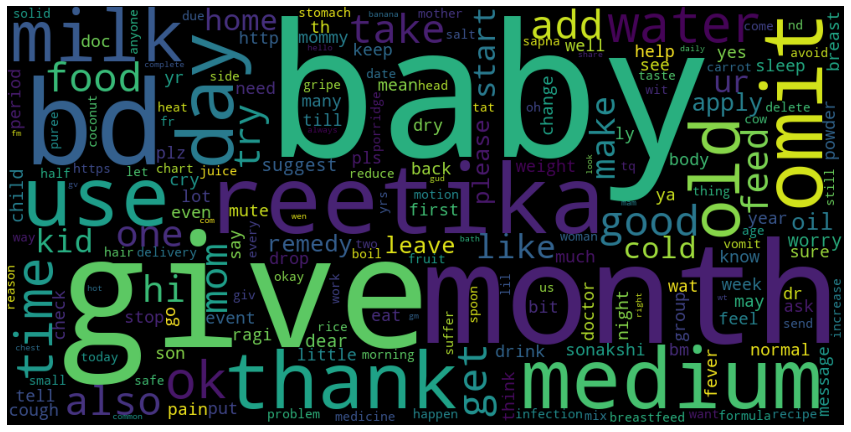

In [41]:
wordtext=[j for i in textdata['Text_new'] for j in i]
word_could_dict=Counter(wordtext)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
wordlist=list(word_could_dict.items())
l=len(wordlist)
for i in range(l-1):
    for j in range(i+1,l):
        if wordlist[i][1]<wordlist[j][1]:
            t=wordlist[i]
            wordlist[i]=wordlist[j]
            wordlist[j]=t
    sortdict=dict(wordlist)
main_words=sortdict.keys()

In [43]:
stop_words=stop_words+['bd','sonakshi','reetika','ok','thank']

In [44]:
for i in stop_words:
    if i in sortdict.keys():
        sortdict.pop(i)

In [45]:
X=[i for i in sortdict]
Y=[j for j in sortdict.values()]

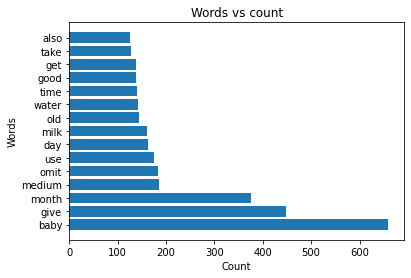

In [46]:
plt.barh(X[:15], Y[:15])
plt.title('Words vs count')
plt.xlabel('Count')
plt.ylabel('Words',fontsize=10)
plt.show()

Few words used mostly, pm showing mostly msgs are from second half of the day